<h1>TAREA 11</h1>
<h2>Sergio Alejandro Diaz Pinilla</h2>
<h2>Julian Camilo Mendez Corredor</h2>
<br>
<br>
<h2>Punto 1</h2>

<li>Estudiarelsoportematemáticoeimplementar,como una función en python, alguno de los siguientes detectores y/o descriptores de imágenes:</li>

<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>


# HOG - Histogram of Oriented Gradients
Es un descriptor de caracteristicas usado para la deteccion de objetos, fue creado por Robert K. McConnell de Wayland Research Inc en 1986.

## Teoria
El pensamiento prinvipal detras de HOG es que la pariencia y forma local de un objeto en una imagen puede ser dercrita por la distribucion de la intencidad del los gradientes o la deteccion de bordes. La imagen es dividida en pequeñas regiones conectadas y por cada pixel de estas regiones se calcula un histograma de gradientes.

In [9]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
img = cv2.imread('Fig/face.png',0)


print "Listo"

Listo


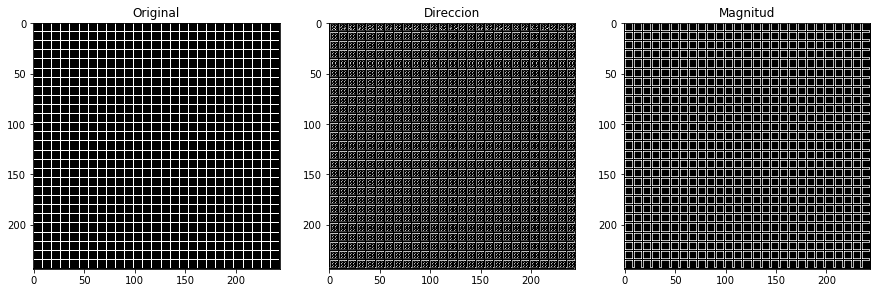

In [28]:
def divide_img(img,r):
    w,h = img.shape
    sec = []
    for i in range(0,w-1,r):
        for j in range(0,h-1,r):
            img[j, i:i+r]= 255
            img[j:j+r, i] = 255
            sec.append(img[j:j+r, i:i+r])
    return sec
img_sec = divide_img(img,9)


img = np.float32(img) / 255.0
"""
plt.figure(1,figsize=(15,5))
for i in range(len(img_sec)):
    plt.subplot(191+i), plt.imshow(img_sec[i], cmap=plt.cm.gray), plt.title('Original'+str(i))
plt.show()
"""
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

plt.figure(2,figsize=(15,5))
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(angle, cmap=plt.cm.gray), plt.title('Direccion')
plt.subplot(133), plt.imshow(mag, cmap=plt.cm.gray), plt.title('Magnitud')
plt.show()

/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in ubyte_scalars


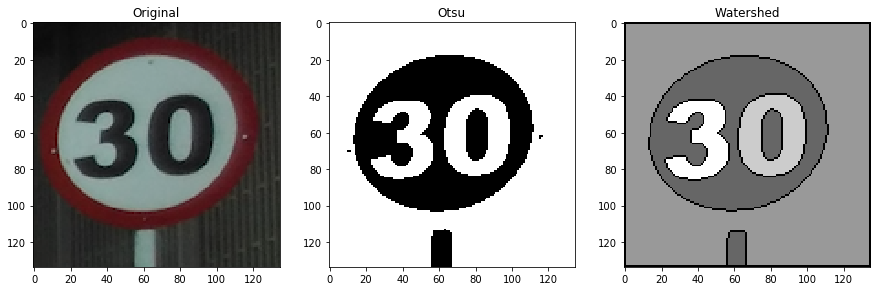

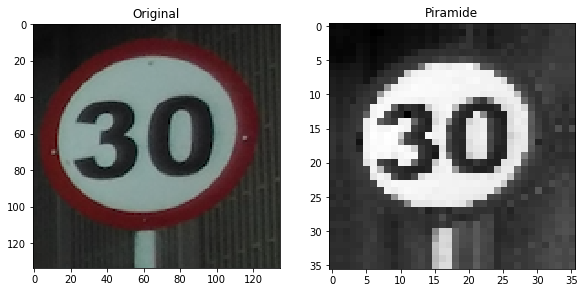

In [8]:
def watershed (img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)



    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.01*dist_transform.max(),255,0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0

    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,0,0]
    return markers,thresh


sign1 = cv2.imread('Fig/sign3.png')
levels ,three = pyramid(cv2.cvtColor(sign1, cv2.COLOR_BGR2GRAY),5)

# Proyecto Sergio
markersSign,threshSign=watershed(sign1.copy())



plt.figure(2,figsize=(15,5))
plt.subplot(131), plt.imshow(cv2.cvtColor(sign1, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(132), plt.imshow(threshSign, cmap=plt.cm.gray), plt.title('Otsu')
plt.subplot(133), plt.imshow(markersSign, cmap=plt.cm.gray), plt.title('Watershed')
plt.show()
plt.figure(3,figsize=(15,5))
plt.subplot(131), plt.imshow(cv2.cvtColor(sign1, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(132), plt.imshow(levels[2], cmap=plt.cm.gray), plt.title('Piramide')
plt.show()

In [24]:
unique, counts = np.unique(threshSign, return_counts=True)
unique2, counts2 = np.unique(markersSign, return_counts=True)
manual = dict(zip(unique2, counts2)).keys()
manual.pop(-1)
manual = np.array(manual)
data1 = np.array(dict(zip(unique, counts)).keys())
data2 = np.array(dict(zip(unique2, counts2)).keys())

def IoU(segOriginal, segManual):
    inter = np.intersect1d(segOriginal, segManual)
    union = np.union1d(segOriginal, segManual)
    return len(inter)/len(union)


def erroRelative(segOriginal, segManual,px,py):
    val = len(np.setdiff1d(np.array(segOriginal[px][py]),np.array(segManual[px][py])))
    return val/segOriginal[px][py]
    

print "------------Medidas de desempeño-------------"
print "-------------------------------------------------"
print "Intersección-sobre-Unión Umbralizada",IoU(manual,data1)
print "Intersección-sobre-Unión watershet",IoU(manual,data2)

print "-------------------------------------------------"

print "erroRelative-sobre-Unión Umbralizada",erroRelative(markersSign,markersSign, 100,100)
print "erroRelative-sobre-Unión watershet",erroRelative(threshSign,markersSign, 100,100)

------------Medidas de desempeño-------------
-------------------------------------------------
Intersección-sobre-Unión Umbralizada 0.0
Intersección-sobre-Unión watershet 0.8
-------------------------------------------------
erroRelative-sobre-Unión Umbralizada 0.0
erroRelative-sobre-Unión watershet 0.00392156862745
